In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from collections import Counter

import scipy
from umap import UMAP
from sklearn.decomposition import PCA

In [2]:
# Stolen from Isabella
def fill_nan_encode_categories(dataframe):
    # replace nan with -1 -> to keep them recognisable
    result = dataframe.fillna(-1)
    # make all columns a category -> even the numerical ones as they are not continuous numbers
    result = result.astype('category')
    # use pd's codes to make them numeric -> -1 disappears this way
    return result.apply(lambda x: x.cat.codes)

In [3]:
raw_df = pd.read_csv("../data/maps-synthetic-data-v1.1.csv")

In [4]:
# columns = ['has_dep_diag',
#            'musi_week', 
#            'musi_wend', 
#            'read_week', 
#            'read_wend', 
#            'out_sum_week',
#            'out_sum_wend', 
#            'out_win_week', 
#            'out_win_wend'
#           ]

columns = ['has_dep_diag',
           'talk_mob_week',
           'talk_mob_wend',
           'text_week',
           'text_wend',
           'tv_week',
           'tv_wend',
           'comp_week',
           'comp_wend'
          ]

In [5]:
df = raw_df[columns]
df.shape

(13734, 9)

In [6]:
# Shamelessly stolen from Isabella
# replace nan with -1 -> to keep them recognisable
df = fill_nan_encode_categories(df)
df.columns

Index(['has_dep_diag', 'talk_mob_week', 'talk_mob_wend', 'text_week',
       'text_wend', 'tv_week', 'tv_wend', 'comp_week', 'comp_wend'],
      dtype='object')

## PCA / UMAP Analysis

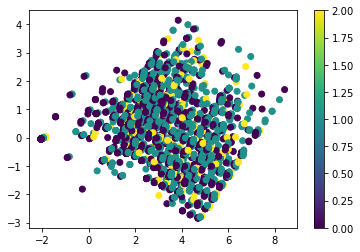

In [7]:
# PCA First

embedder = PCA()
embedder.fit(df)
embedding = embedder.transform(df)

plt.scatter(embedding[:,0],embedding[:,1], c=df['has_dep_diag'])
plt.colorbar()

Well that is not helpful at all

Try UMAP?

In [8]:
embedder = UMAP(n_neighbors=500,n_jobs=6,verbose=True)
embedder.fit(df, y=df['has_dep_diag'])
embedding = embedder.transform(df)

UMAP(n_jobs=6, n_neighbors=500, verbose=True)
Fri Apr 22 14:47:09 2022 Construct fuzzy simplicial set
Fri Apr 22 14:47:09 2022 Finding Nearest Neighbors
Fri Apr 22 14:47:09 2022 Building RP forest with 11 trees
Fri Apr 22 14:47:09 2022 NN descent for 14 iterations


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Fri Apr 22 14:47:23 2022 Finished Nearest Neighbor Search
Fri Apr 22 14:47:27 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Fri Apr 22 14:49:33 2022 Finished embedding


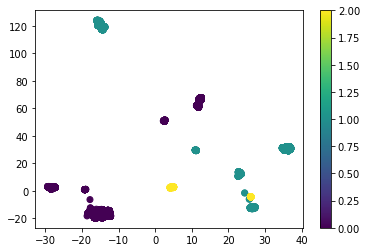

In [9]:
# 2 has depression, 1 does not, 0 is NaN

plt.scatter(embedding[:,0],embedding[:,1], c=df['has_dep_diag']) 
plt.colorbar()

In [10]:
from hdbscan import HDBSCAN

In [11]:
# embedding[df['has_dep_diag'] != 0 removes the NaN from the plot

clusterer = HDBSCAN(min_cluster_size=100)
cluster_labels = clusterer.fit_predict(embedding[df['has_dep_diag'] != 0,:])

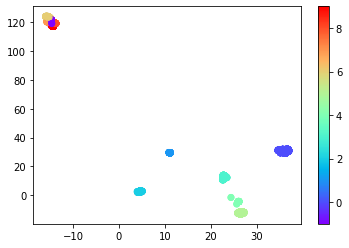

In [12]:
#  HDB sets -1 to noise
plt.scatter(embedding[df['has_dep_diag'] != 0,0],embedding[df['has_dep_diag'] != 0,1], c=cluster_labels, cmap='rainbow') 
plt.colorbar()

In [13]:
newdf = df[(df['has_dep_diag'] != 0)]#] & (df[cluster_labels] == 2)]
newdf = newdf[(cluster_labels == 2)]
newdf

,has_dep_diag,talk_mob_week,talk_mob_wend,text_week,text_wend,tv_week,tv_wend,comp_week,comp_wend
7,1,0,0,0,0,0,0,0,0
27,1,0,0,0,0,0,0,0,0
37,1,0,0,0,0,0,0,0,0
59,1,0,0,0,0,0,0,0,0
94,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
13693,1,0,0,0,0,0,0,0,0
13706,1,0,0,0,0,0,0,0,0
13710,1,0,0,0,0,0,0,0,0
13717,1,0,0,0,0,0,0,0,0


That is a cool hat... don't think the data is relevent though. Colours are completely scattered throughout, no real clumps of data together either. Interesting line that makes up the rim of the hat though, wonder what that means